<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/EEG_HMC.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep_Stage']]   #target column 

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [5]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,62.731243
1,MedianF_Alpha_F4,625.441584
2,MeanF_Alpha_F4,4186.932107
3,Spectral Edge_Alpha_F4,4760.597022
4,PeakF_Alpha_F4,388.837305
...,...,...
70,MeanP_Gamma_O2,26.248133
71,MedianF_Gamma_O2,539.956987
72,MeanF_Gamma_O2,374.193067
73,Spectral Edge_Gamma_O2,358.426283


In [12]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
59           PeakF_Beta_O2  13501.822460
9            PeakF_Beta_F4   8003.136934
34           PeakF_Beta_C4   5144.466182
3   Spectral Edge_Alpha_F4   4760.597022
2           MeanF_Alpha_F4   4186.932107
8    Spectral Edge_Beta_F4   3953.173955
74          PeakF_Gamma_O2   3329.282921
6          MedianF_Beta_F4   3081.298755
28  Spectral Edge_Alpha_C4   2979.921329
27          MeanF_Alpha_C4   2616.797850


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs         Score
59           PeakF_Beta_O2  13501.822460
9            PeakF_Beta_F4   8003.136934
34           PeakF_Beta_C4   5144.466182
3   Spectral Edge_Alpha_F4   4760.597022
2           MeanF_Alpha_F4   4186.932107
8    Spectral Edge_Beta_F4   3953.173955
74          PeakF_Gamma_O2   3329.282921
6          MedianF_Beta_F4   3081.298755
28  Spectral Edge_Alpha_C4   2979.921329
27          MeanF_Alpha_C4   2616.797850


In [28]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[3.10797424e-05 1.29302923e-02 3.06637444e-02 2.60574405e-02
 1.30426756e-02 4.57920619e-06 3.19354228e-02 2.09441895e-02
 2.12905591e-02 1.63094892e-02 2.46391329e-04 2.61589201e-02
 1.53549193e-02 1.41116123e-02 1.46604798e-02 1.98778938e-03
 6.20205237e-03 2.19833648e-02 1.82661629e-02 1.01857641e-02
 2.32123008e-05 1.70378507e-02 1.46465288e-02 1.18293530e-02
 9.28119450e-03 3.38756299e-05 1.26498945e-02 2.21276218e-02
 2.02463352e-02 1.22789239e-02 3.23559838e-04 1.98493990e-02
 1.72801580e-02 1.86892458e-02 1.27455803e-02 3.29421708e-04
 2.87588876e-02 1.51264217e-02 1.49234178e-02 1.65160976e-02
 2.20226202e-03 9.47698818e-03 3.03578193e-02 2.32953089e-02
 8.59627414e-03 3.26420863e-04 1.41963540e-02 1.25561938e-02
 9.86366077e-03 9.01795131e-03 4.15367899e-05 1.71160307e-02
 1.50280275e-02 1.57939396e-02 1.29285382e-02 2.34312706e-06
 1.52708246e-02 1.58839411e-02 1.48815764e-02 1.31429403e-02
 2.97119612e-04 2.57536849e-02 1.67194849e-02 2.02839358e-02
 1.67398252e-02 2.226191

In [27]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

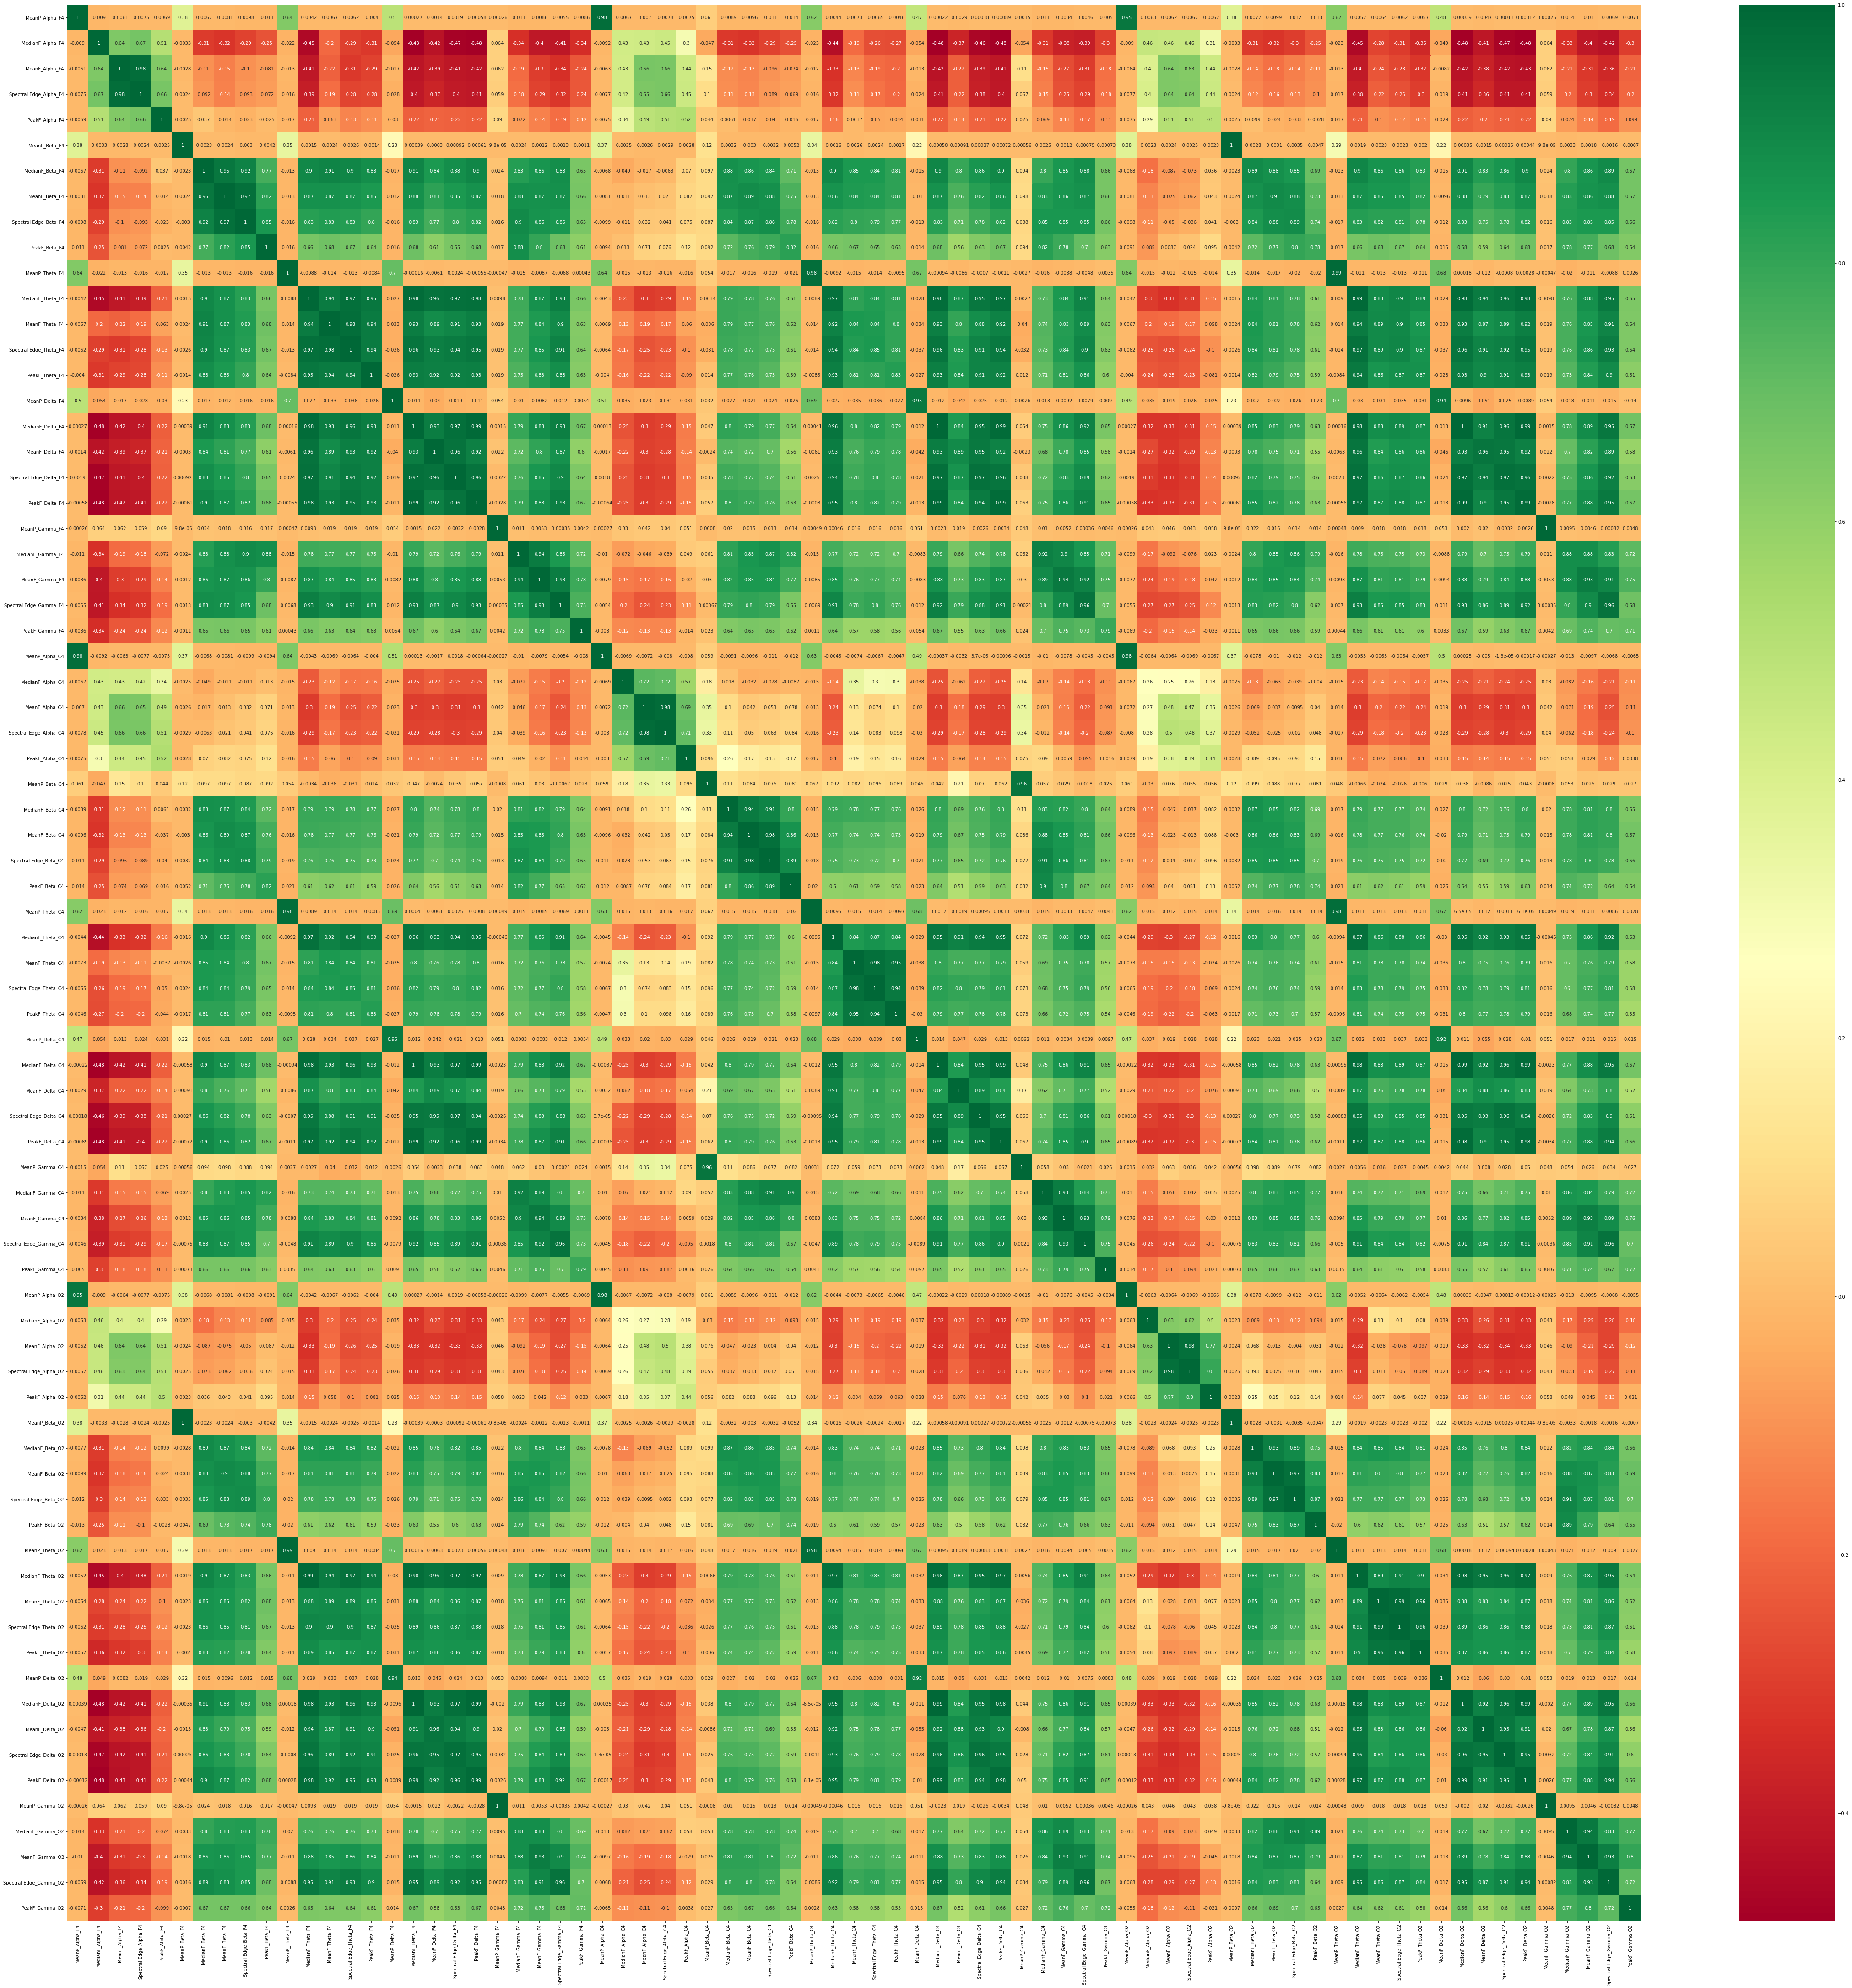

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")